In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('spotify-2023.csv', sep=',', encoding='ISO-8859-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [2]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [3]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [4]:
for i in range(data.shape[0]):
    try:
        value = int(data.loc[i, 'in_deezer_playlists'])
    except ValueError:
            data = data.drop(i)
data.reset_index(drop = True, inplace = True)
data['in_deezer_playlists'] = data['in_deezer_playlists'].apply(lambda x: int(x))

In [5]:
data.loc[48,:]

track_name                    Die For You - Remix
artist(s)_name          Ariana Grande, The Weeknd
artist_count                                    2
released_year                                2023
released_month                                  2
released_day                                   24
in_spotify_playlists                         3408
in_spotify_charts                              47
streams                                 518745108
in_apple_playlists                             87
in_apple_charts                                86
in_deezer_playlists                            74
in_deezer_charts                                1
in_shazam_charts                               16
bpm                                            67
key                                            C#
mode                                        Minor
danceability_%                                 53
valence_%                                      50
energy_%                                       53


In [6]:
for i in range(data.shape[0]):
    try:
        value = int(data.loc[i, 'in_shazam_charts'])
    except ValueError:
            data = data.drop(i)
data.reset_index(drop = True, inplace = True)            
data['in_shazam_charts'] = data['in_shazam_charts'].apply(lambda x: int(x))

In [7]:
for i in range(data.shape[0]):
    try:
        stream = int(data.loc[i, 'streams'])
    except ValueError:
        data = data.drop(i)
data.reset_index(drop = True, inplace = True)
data['streams'] = data['streams'].apply(lambda x: int(x))

In [8]:
streams = data['streams']
playlists = data['in_spotify_playlists']

In [9]:
q1 = playlists.quantile(q = 0.75)
q2 = streams.quantile(q = 0.75)

print('Third quartile(playlists):',q1)
print('Third quartile(streams):',q2)
print('Max in playlists:', max(playlists))
print('Max in playlists:', max(streams))

Third quartile(playlists): 3879.0
Third quartile(streams): 481697415.0
Max in playlists: 29499
Max in playlists: 2808096550


In [10]:
streams = data['streams'].apply(lambda x: (x * data.shape[0]) /sum(data['streams']))
streams

0      0.378186
1      0.357682
2      0.374501
3      2.142193
4      0.811136
         ...   
824    0.244685
825    0.325999
826    0.196644
827    0.358161
828    0.256813
Name: streams, Length: 829, dtype: float64

In [11]:
playlists = data['in_spotify_playlists'].apply(lambda x: (x * data.shape[0]) / sum(data['in_spotify_playlists']))
playlists

0      0.177461
1      0.473015
2      0.448305
3      2.521676
4      1.005397
         ...   
824    0.305823
825    0.378669
826    0.183879
827    0.423595
828    0.250948
Name: in_spotify_playlists, Length: 829, dtype: float64

In [12]:
s1 = stats.shapiro(playlists)
s2 = stats.shapiro(streams)
print(s1)
print(s2)

ShapiroResult(statistic=0.7083858251571655, pvalue=1.4074141343970883e-35)
ShapiroResult(statistic=0.7792739272117615, pvalue=5.686063657978343e-32)


I have enough evidence to reject the null hypothesis that variables have normal distribution.

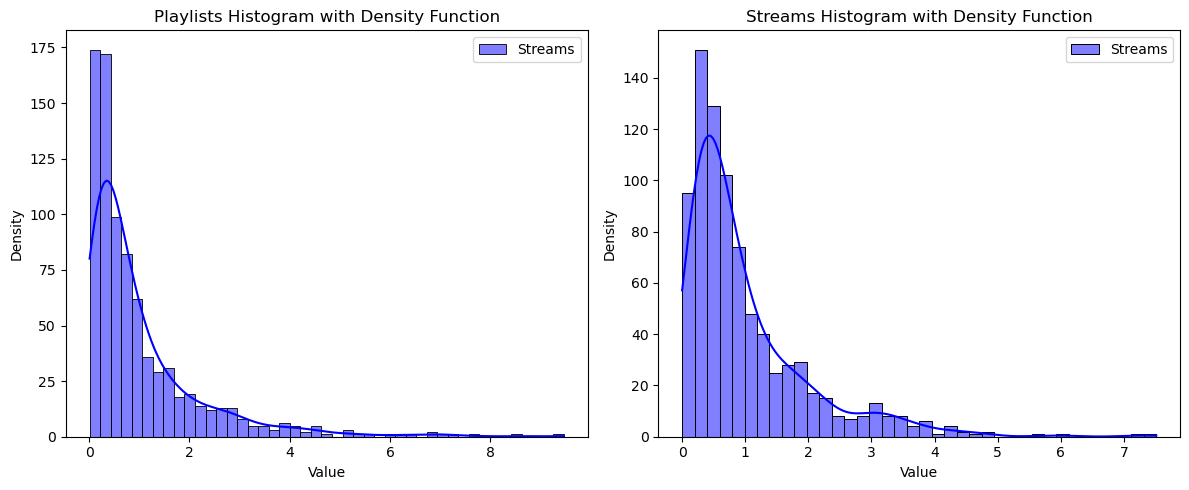

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(playlists, kde=True, color='b', label='Streams', ax=axes[0])

sns.histplot(streams, kde=True, color='b', label='Streams', ax=axes[1])
axes[1].set_title("Streams Histogram with Density Function")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].legend()

axes[0].set_title("Playlists Histogram with Density Function")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].legend()

plt.tight_layout()
plt.show()

In [14]:
stats.mannwhitneyu(x = streams, y = playlists)

MannwhitneyuResult(statistic=373015.0, pvalue=0.002564837864656052)

There is a huge difference in their distribution. We cannot use a Pearson's test to find the correlation. We will use Spearman Rank instead.

In [15]:
correlation, p_value = stats.spearmanr(playlists, streams)
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.7728523668258201
P-value: 1.6374294526718744e-165


We conclude that there is a significant correlation.

In [16]:
streams_a = np.array(streams).reshape(-1, 1)
playlists_a = np.array(playlists).reshape(-1, 1)

In [17]:
reg = LinearRegression().fit(playlists_a, streams_a)
alpha = reg.intercept_
beta = reg.coef_
print("Intercept (alpha):", alpha)
print("Coefficients (beta):", beta)

Intercept (alpha): [0.37463435]
Coefficients (beta): [[0.62536565]]


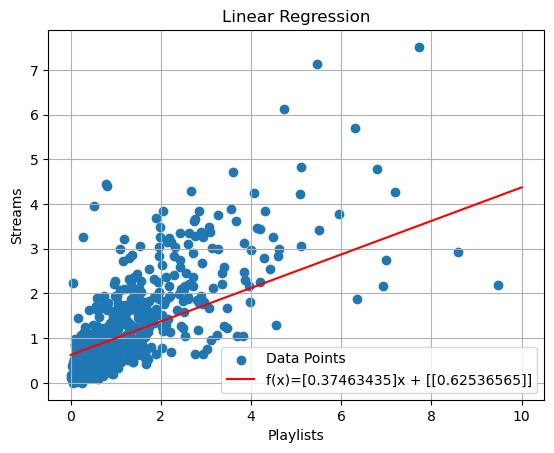

In [18]:
x = np.linspace(0, 10, playlists.shape[0])
y = alpha * x + beta

plt.scatter(playlists, streams, label='Data Points')
plt.plot(x, np.squeeze(y), color='red', label=f'f(x)={alpha}x + {beta}')


plt.xlabel('Playlists')
plt.ylabel('Streams')
plt.title('Linear Regression')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
bpm = data['bpm'].apply(lambda x: int(x))
print('Max BPM:',max(bpm))
print('Mim BPM:',min(bpm))

Max BPM: 206
Mim BPM: 65


In [20]:
bpm.apply(lambda x: (x * data.shape[0]) / sum(data['bpm']))

0      1.016589
1      0.748210
2      1.122314
3      1.382561
4      1.171111
         ...   
824    1.171111
825    1.350030
826    0.748210
827    0.788873
828    0.731944
Name: bpm, Length: 829, dtype: float64

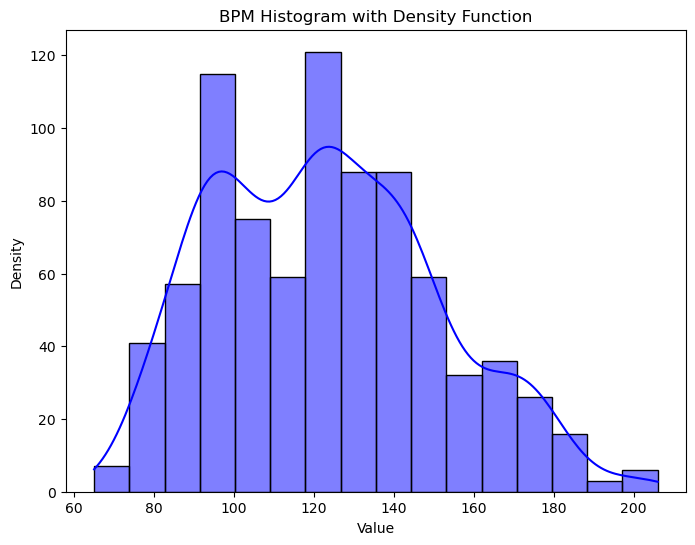

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(bpm, kde=True, color='b', label='BPM')
plt.title("BPM Histogram with Density Function")
plt.xlabel("Value")
plt.ylabel("Density")

plt.show()

In [22]:
stats.shapiro(bpm)

ShapiroResult(statistic=0.978337824344635, pvalue=9.539213863263285e-10)

I have enough evidence to reject the null hypothesis that BPM have normal distribution. <br>
Now, we will check if there is a correlation between BMP and streams.

In [23]:
correlation, p_value = stats.spearmanr(bpm, streams)
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.029487139595214807
P-value: 0.39648939459969124


It means that this is very weak correlation.

In [24]:
print('Number of rows:', data.shape[0])
data.dtypes

Number of rows: 829


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [25]:
for i in range(data.shape[0]):
    value = data.loc[i, 'mode']
    if value == 'Minor':
        data.loc[i, 'mode'] = 0
    else:
        data.loc[i, 'mode'] = 1
data['mode'] = data['mode'].apply(lambda x: int(x))

In [26]:
print(data['key'].unique())
keys = {
         'B': int(0),
        'C#': int(1),
         'F': int(2),
         'A': int(3),
         'D': int(4),
        'F#': int(5),
        'G#': int(6),
         'G': int(7),
         'E': int(8),
        'A#': int(9),
        'D#': int(10)
        }

for i in range(data.shape[0]):
    if pd.isna(data.loc[i, 'key']) == True:
        data = data.drop(i)
        
data = data.reset_index(drop = True) 

data['key'] = data['key'].apply(lambda x: keys[x])

['B' 'C#' 'F' 'A' 'D' 'F#' 'G#' 'G' nan 'E' 'A#' 'D#']


In [27]:
X = data.drop(columns = ['track_name','artist(s)_name', 'mode'])
y = data['mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.62